# (Core) Resampling Datetime Data- Amber Kutscher

For this assignment, you will be working with a modified version of weather data from London from Kaggle.

The assignment is split into 2 parts:
- Part 1: Load the data and create a datetime index
- Part 2: Answer 2 Questions using visualizations and the correct frequency data

**Part 1) Load the data and make a datetime index.**
- Use the modified version of the data provided here:
    - Share URL: https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    - Raw URL: https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

**Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)**
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

**Q1: What month had the most precipitation between 2000 through 2010?**
- Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

**Visualization Issue Workaround**
- NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:
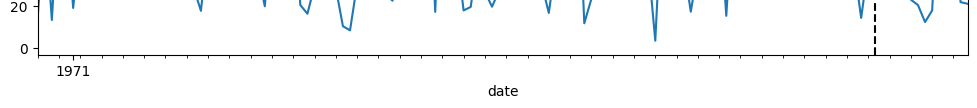
- To get around this issue, first, create your fig and ax using plt.subplots()
    - Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

**Q1 Visualization Requirements**
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks

**Q2: Which year between 2000-2020 had the coolest average temperature?**
- Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q3) Visualization Requirements**
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
        - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

# Part 1) Load the data and make a datetime index.

## Load the Data

In [19]:
# Imports
import numpy as no
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load the data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


## 1. Convert the date column to datetime dtype.

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## 2. Set the date column as the index.

In [22]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [23]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## 3. Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [24]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## 4. Impute any missing values.


In [25]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [26]:
# Interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

In [27]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [28]:
# Filling precipitation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [29]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

In [30]:
# Import tick customization tools
from matplotlib import dates as mdates
from matplotlib import ticker as mticks

**Q1: What month had the most precipitation between 2000 through 2010?**
- Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.

**Visualization Issue Workaround**
- NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled, like the screenshot below:
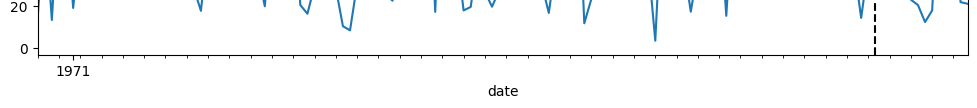
- To get around this issue, first, create your fig and ax using plt.subplots()
    - Now you may use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)

**Q1 Visualization Requirements**
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks

In [31]:
# Filter the DataFrame to include data for the year 2000 through 2010
df_filtered = df['2000-01-01':'2010-12-31']

In [32]:
# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
monthly_precip = df_filtered['precipitation'].resample('M').sum()
monthly_precip

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [33]:
# Find the date and corresponding value for the max precipitation
max_precip_date = monthly_precip.idxmax()
max_precip_val = monthly_precip.max()

# Determine the date and value for the most precipitation (the max precipitation).
print(f"Max Precipitation Date: {max_precip_date.strftime('%B %Y')}")
print(f"Max Precipitation Value: {max_precip_val} Inches")

Max Precipitation Date: November 2009
Max Precipitation Value: 138.4 Inches


**Findings:** 
The month that had the most precipitation between 2000 and 2010 was November 2009 with a total of 138.4 inches of precipitation.

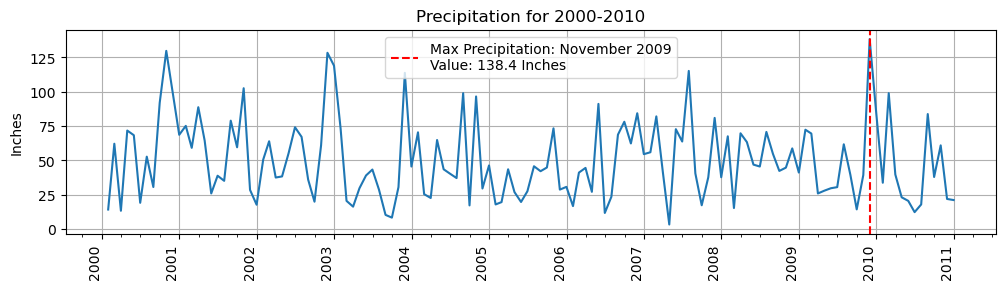

In [34]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12,3))

# Plot the data
ax.plot(monthly_precip)
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# Customize major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor ticks
minor_loc = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)

# Final xdate tweaks
fig.autofmt_xdate(which='major', rotation=90)

# Add a vertical line at max precip date with a label that says the date 
# (using date format: "April 2000") and the max precipitation value.
ax.axvline(max_precip_date, color='red', linestyle='--', 
           label=f'Max Precipitation: {max_precip_date.strftime("%B %Y")}\nValue: {max_precip_val} Inches')

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

**Q2: Which year between 2000-2020 had the coolest average temperature?**
- Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.
- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

**Q2 Visualization Requirements**
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks

In [35]:
# Filtering data for 2000-2020
df_2000_2020 = df['2000-01-01':'2020-12-31']

# Resample the mean_temp to a Yearly frequency using .mean()
yearly_mean_temp = df_2000_2020['mean_temp'].resample('Y').mean()

In [36]:
# Find the date and corresponding value for the lowest mean temp
lowest_mean_temp_date = yearly_mean_temp.idxmin()
lowest_mean_temp_val = yearly_mean_temp.min()

# Determine the date and value for the lowest mean temp
print(f"Lowest Mean Temperature Year: {lowest_mean_temp_date.strftime('%Y')}")
print(f"Lowest Mean Temperature Value: {lowest_mean_temp_val} Degrees")

Lowest Mean Temperature Year: 2010
Lowest Mean Temperature Value: 10.657397260273973 Degrees


**Findings:** The year between 2000 and 2020 that had the coolest average temperature was 2010 with a lowest mean average temperature of 10.66 degrees.

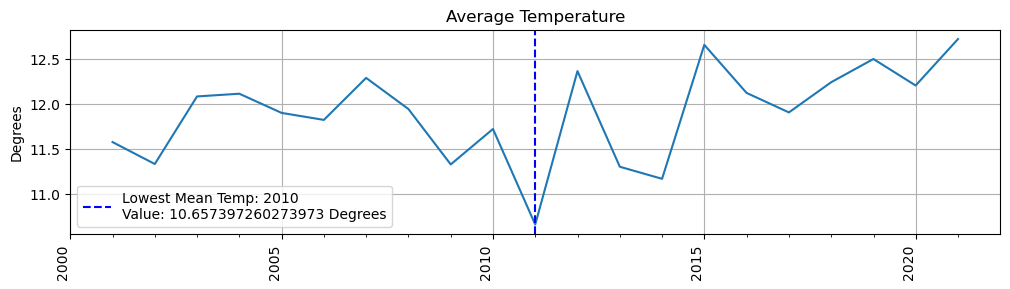

In [37]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12,3))

# Plot the data
ax.plot(yearly_mean_temp)
ax.set(title='Average Temperature', ylabel='Degrees')

# Customize major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor ticks
minor_loc = mdates.YearLocator(1)
ax.xaxis.set_minor_locator(minor_loc)

# Final xdate tweaks
fig.autofmt_xdate(which='major', rotation=90)

# Add a vertical line at max precip date with a label that says the date 
# (using date format: "April 2000") and the max precipitation value.
ax.axvline(lowest_mean_temp_date, color='blue', linestyle='--', 
           label=f'Lowest Mean Temp: {lowest_mean_temp_date.strftime("%Y")}\nValue: {lowest_mean_temp_val} Degrees')

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()